In [1]:

# Importamos Librerias 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

# Opcion para mostrar todas las columnas de un dataframe
pd.options.display.max_columns = None

# Desactivar todos los mensajes de advertencia
warnings.filterwarnings("ignore")

In [2]:
# Creamos data frame 
df = pd.read_csv('ML_cars.csv')

In [3]:
# Obtenemos un primer vistazo de la data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [4]:
# Eliminamos columnas irrelevantes tras analizar su tipo, contenido de la columna y 
# analizar la matriz de correlacion de las variables numericas 

df.drop(['car_ID', 'stroke', 'compressionratio', 'enginelocation', 'fueltype', 'peakrpm'], axis=1, inplace=True)

In [5]:
#  Extraer nombres de fabricantes de la columna 'CarName', a nueva columna 'fabricante' con el objetivo de 
# identificar la participacion del mercado de cada marca 
df['fabricante'] = df['CarName'].apply(lambda x: x.split(" ")[0])
df.drop(['CarName'], axis=1, inplace=True)

In [6]:

# reemplazar todos los valores incorrectos por valores correctos en columnas específicas Ej: {'fabricante':{'maxda':'mazda'}}
fabricantes_corregidos = {'fabricante': {'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'}}
df.replace(fabricantes_corregidos, inplace=True)
df['fabricante'].value_counts()

fabricante
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [7]:
# Creacion de la columna 'volumen', considerandola como la mejor opcion para reducir el tamaño del dataset al 
# operar las tres variables del volumen 
df['volumen'] = df['carlength'] * df['carwidth'] * df['carheight']

# Eliminacion de las columnas originales.
df.drop(['carlength', 'carwidth', 'carheight'], axis=1, inplace=True)

In [8]:
# Creaccion columna 'rendimientopromedio' , seguimos reduciendo el tamaño del data set al promediar el 
# rendimiento en ciudad y carretera.

df['mpgpromedio'] = df[['citympg', 'highwaympg']].mean(axis=1)
# Eliminación columnas originales

df.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

In [9]:
# Mapeamos 'cylindernumber' (tipo str) al valor equivalente numerico (tipo int) al considerarla como una caracteristica
# que muy probablente influiria en el precio.
df.cylindernumber.replace({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}, inplace=True)

In [10]:
# Revisamos que se hayan realizado los cambios correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       205 non-null    int64  
 1   aspiration      205 non-null    object 
 2   doornumber      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   curbweight      205 non-null    int64  
 7   enginetype      205 non-null    object 
 8   cylindernumber  205 non-null    int64  
 9   enginesize      205 non-null    int64  
 10  fuelsystem      205 non-null    object 
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  price           205 non-null    float64
 14  fabricante      205 non-null    object 
 15  volumen         205 non-null    float64
 16  mpgpromedio     205 non-null    float64
dtypes: float64(5), int64(5), object(7)


In [11]:
# Cambio del tipo de dato de la columna 'symboling' a 'object', analizando que es una variable que califica
# el grado de seguridad de cada auto

df['symboling'] = df['symboling'].astype('object', copy=True)

# Seleccionamos variables numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])

# Seleccionamos variables categóricas
categoricas = df.select_dtypes(include='object')

# Imprimir las variables numéricas
print("Variables Numéricas:")
print(numericas.columns.to_list())

# Imprimir las variables categóricas
print("\nVariables Categóricas:")
print(categoricas.columns.to_list())


Variables Numéricas:
['wheelbase', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'price', 'volumen', 'mpgpromedio']

Variables Categóricas:
['symboling', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'fabricante']


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [12]:
df.describe()

,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,price,volumen,mpgpromedio
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,2555.565854,4.380488,126.907317,3.329756,104.117073,13276.710571,618719.288873,27.985366
std,6.021776,520.680204,1.080854,41.642693,0.270844,39.544167,7988.852332,79463.195262,6.666038
min,86.600000,1488.000000,2.000000,61.000000,2.540000,48.000000,5118.000000,452643.156000,15.000000
25%,94.500000,2145.000000,4.000000,97.000000,3.150000,70.000000,7788.000000,566490.600000,22.500000
50%,97.000000,2414.000000,4.000000,120.000000,3.310000,95.000000,10295.000000,601385.700000,27.000000
75%,102.400000,2935.000000,4.000000,141.000000,3.580000,116.000000,16503.000000,666250.200000,32.000000
max,120.900000,4066.000000,12.000000,326.000000,3.940000,288.000000,45400.000000,846007.659000,51.500000


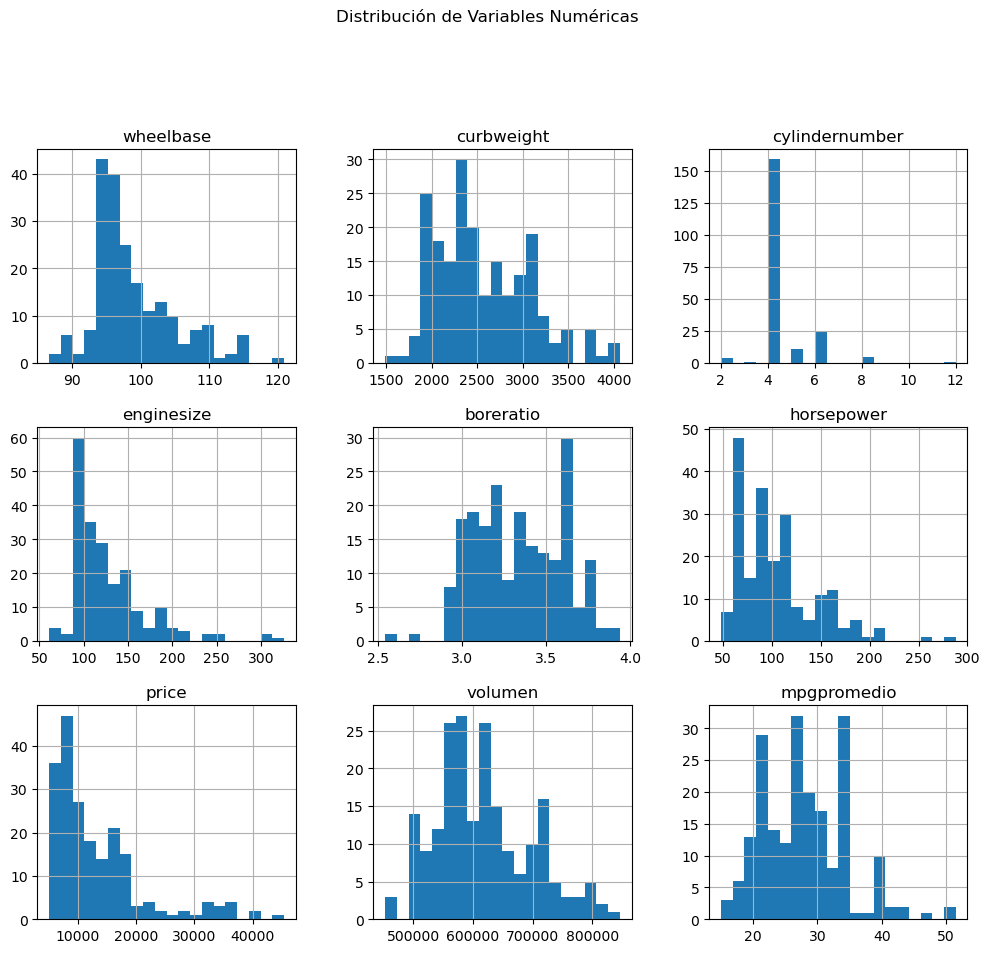

In [13]:
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribución de Variables Numéricas', y=1.02)
plt.show()

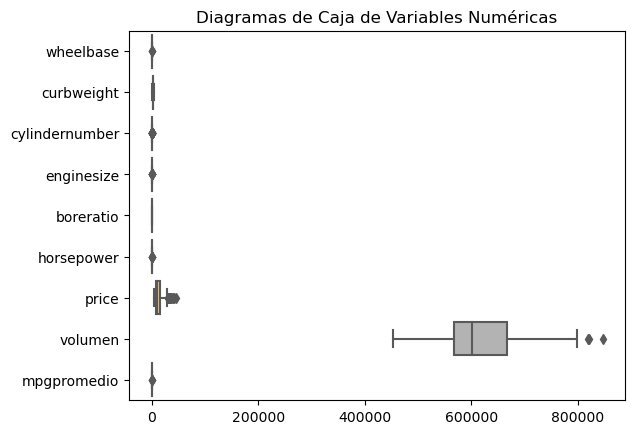

In [14]:

# Realmente aporta 

sns.boxplot(data=numericas, orient='h', palette='Set2')
plt.title('Diagramas de Caja de Variables Numéricas')
plt.show()


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

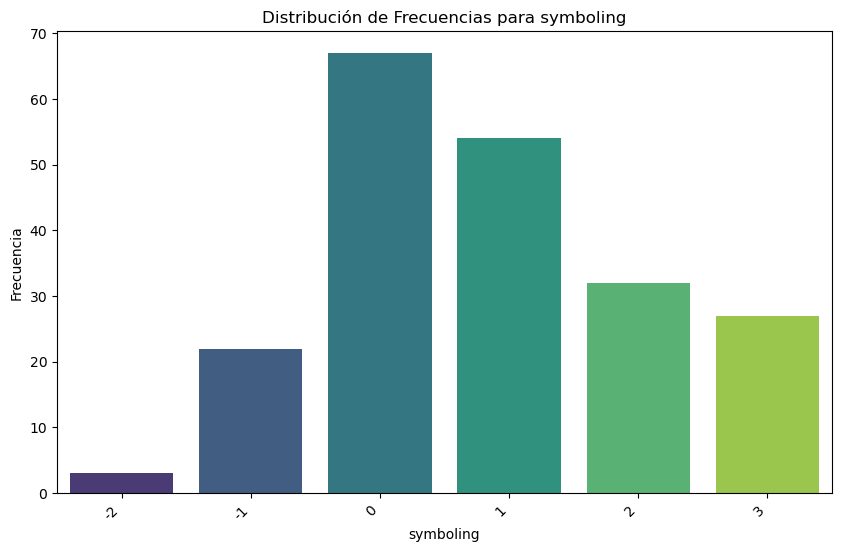

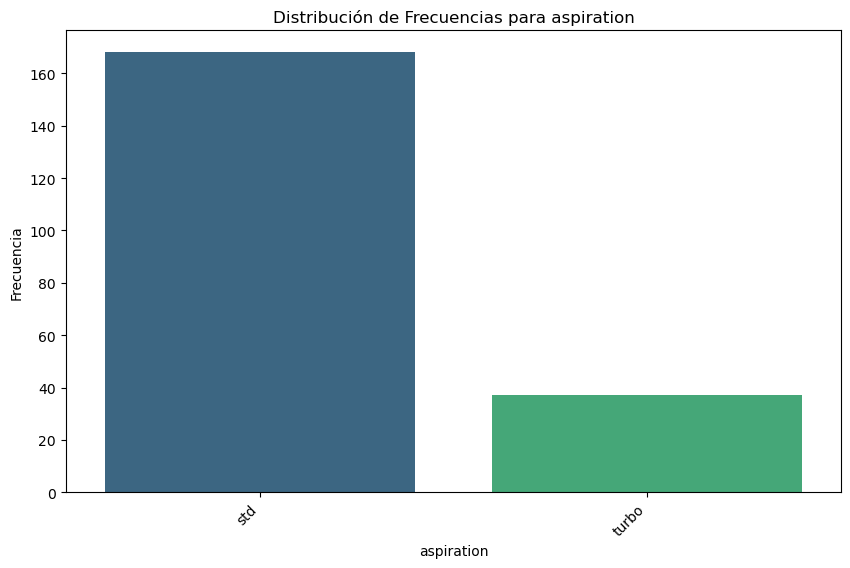

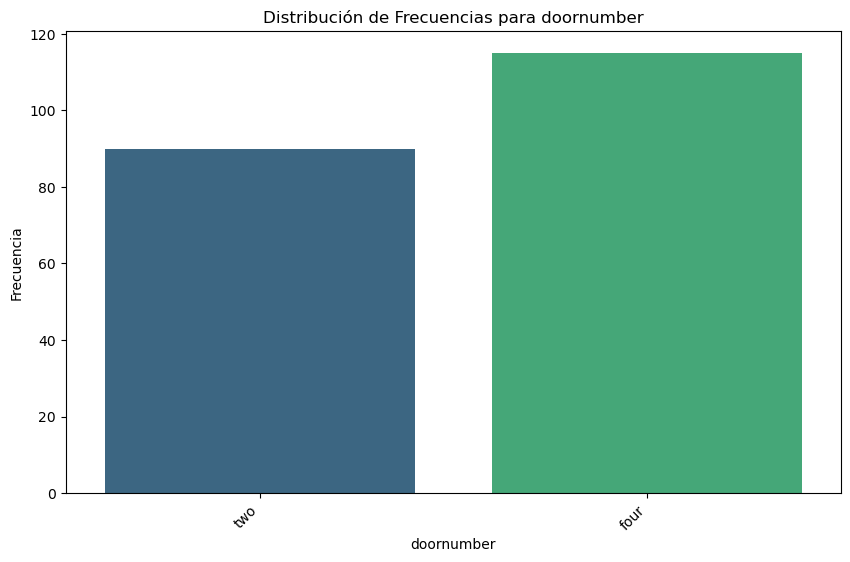

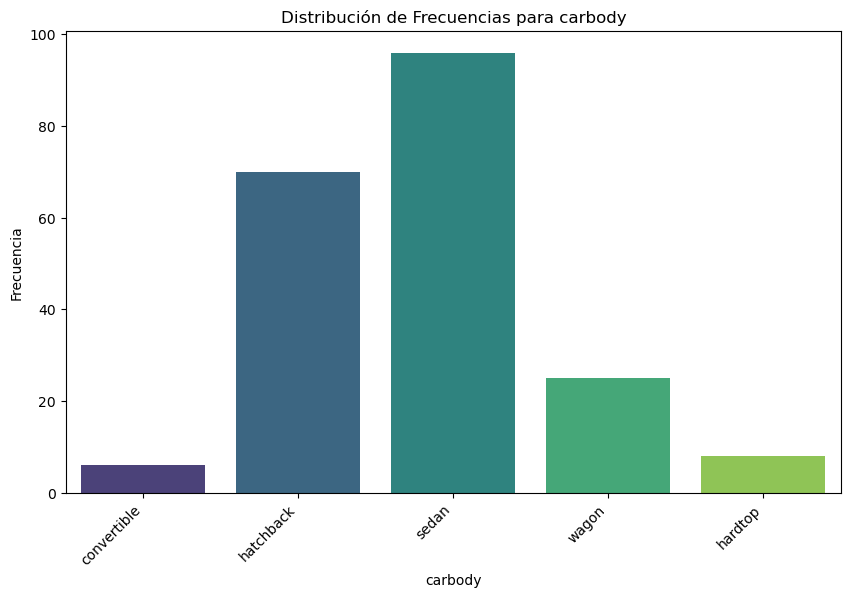

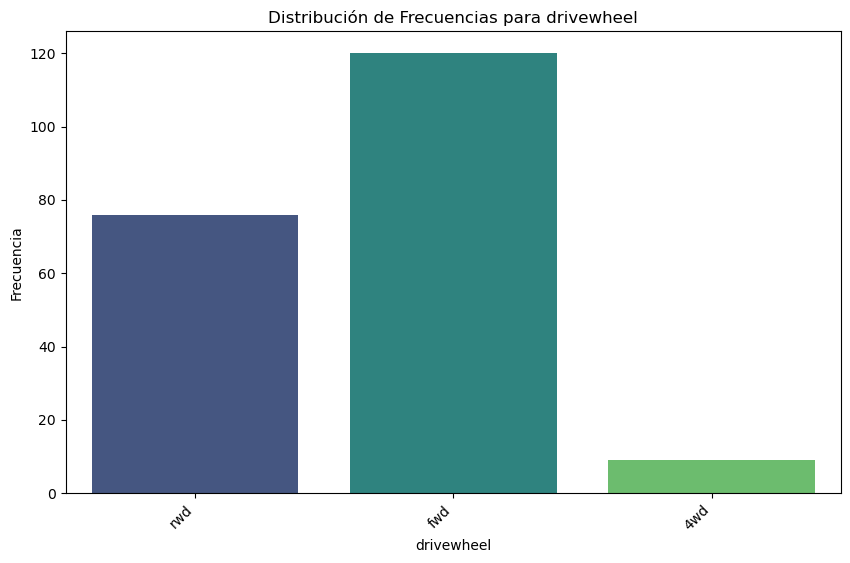

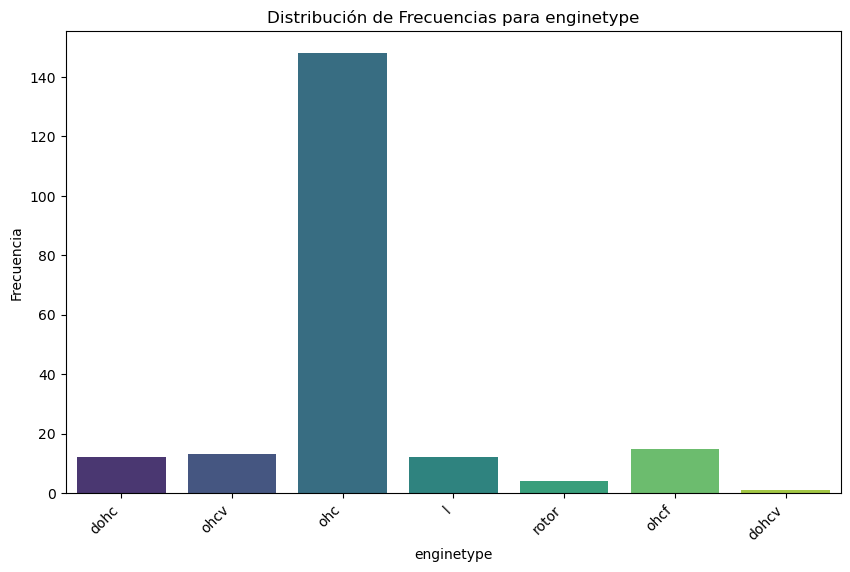

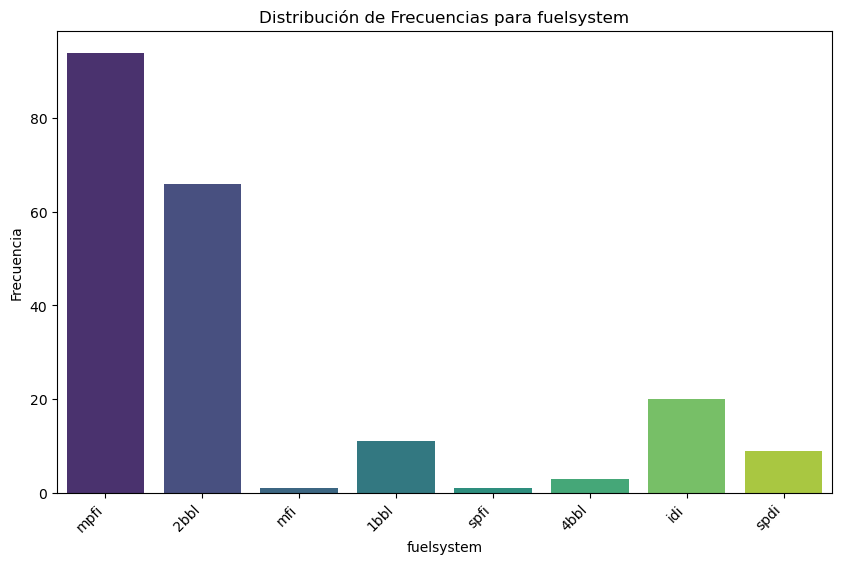

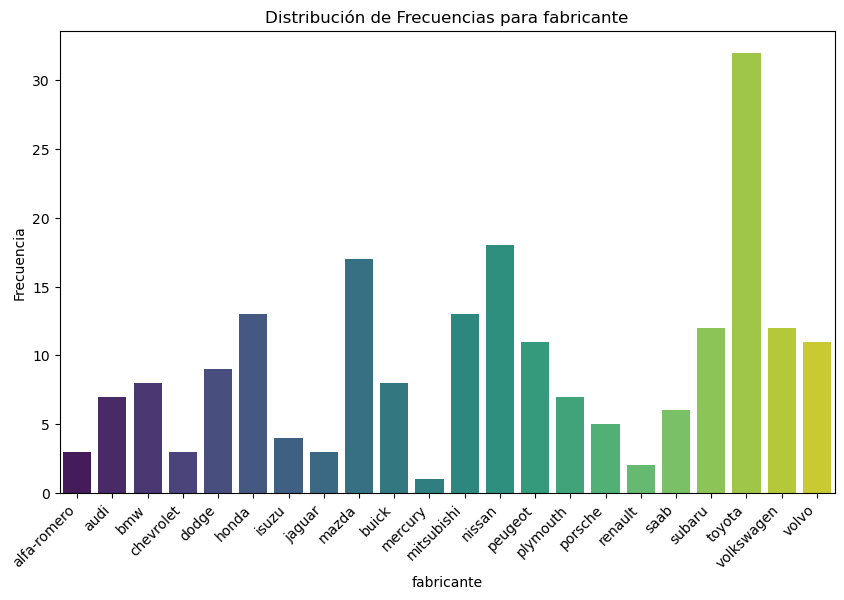

In [15]:
# Seleccionar solo las variables categóricas excluyendo 'car_ID' 

categoricas_plot = df.select_dtypes(include='object')
for columna in categoricas_plot.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=columna, data=df, palette='viridis')
    plt.title(f'Distribución de Frecuencias para {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
    plt.show()


Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [1]:
# No hay valores nulos, por ende no se imputaran valores 

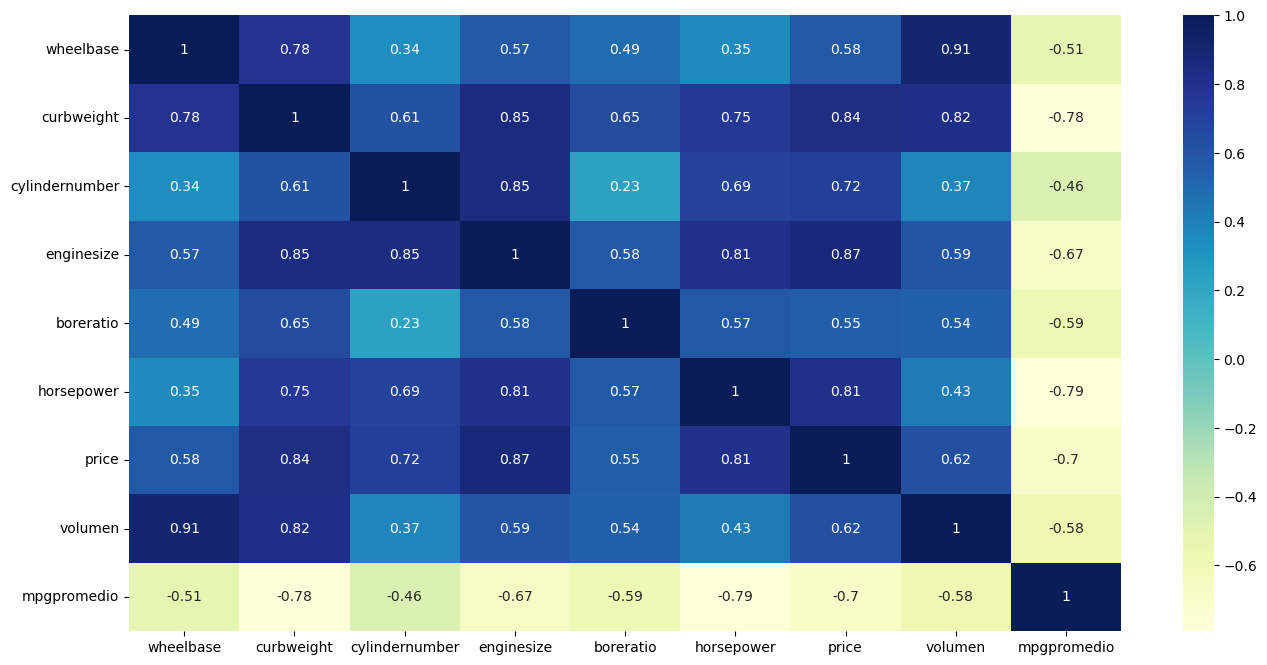

In [17]:
# Creamos Heatmap de correlación para identificar variables numericas mas relevantes 

plt.figure(figsize=(16,8))
sns.heatmap(df.filter(items=numericas,  axis=1).corr(), cmap="YlGnBu", annot=True)
plt.show()

Preparación para el Data Modeling / Regresion

In [18]:
# Definición de X variables predictoras  & y
X = df.loc[:, ['symboling', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'wheelbase', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'fabricante', 'volumen', 'mpgpromedio']]
y = df['price']

In [19]:
# Convertir categoricas a dummies
categoricas_dummies = pd.get_dummies(categoricas, drop_first=True)

In [20]:
# Eliminar columnas originales de variables categóricas de X
X = X.drop(list(categoricas.columns), axis=1)

# Concatenar variables dummy con X
X = pd.concat([X, categoricas_dummies], axis=1)

# Visualizar las primeras filas de X
X.head()

# X = X.drop(list(categoricas.columns), axis=1)
# X = pd.concat([X, categoricas_dummies], axis=1)
# X.head()

,wheelbase,curbweight,cylindernumber,enginesize,boreratio,horsepower,volumen,mpgpromedio,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fabricante_audi,fabricante_bmw,fabricante_buick,fabricante_chevrolet,fabricante_dodge,fabricante_honda,fabricante_isuzu,fabricante_jaguar,fabricante_mazda,fabricante_mercury,fabricante_mitsubishi,fabricante_nissan,fabricante_peugeot,fabricante_plymouth,fabricante_porsche,fabricante_renault,fabricante_saab,fabricante_subaru,fabricante_toyota,fabricante_volkswagen,fabricante_volvo
0,88.6,2548,4,130,3.47,111,528019.904,24.0,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,88.6,2548,4,130,3.47,111,528019.904,24.0,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,94.5,2823,6,152,2.68,154,587592.640,22.5,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,99.8,2337,4,109,3.19,102,634816.956,27.0,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,99.4,2824,5,136,3.19,115,636734.832,20.0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
# Aplicar el scaling, y reasginar los nombres de las columnas,
# ya que los nombres se pierden después del scaling
columnas = X.columns
X = pd.DataFrame(scale(X))
X.columns = columnas

In [22]:
# Se ve afectado por valores atipicos?  
'''Datos originales:
[[1 2]
 [3 4]
 [5 6]]

Datos estandarizados:
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]'''


'Datos originales:\n[[1 2]\n [3 4]\n [5 6]]\n\nDatos estandarizados:\n[[-1.22474487 -1.22474487]\n [ 0.          0.        ]\n [ 1.22474487  1.22474487]]'

In [23]:
df.head(3)

,symboling,aspiration,doornumber,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,fabricante,volumen,mpgpromedio
0,3,std,two,convertible,rwd,88.6,2548,dohc,4,130,mpfi,3.47,111,13495.0,alfa-romero,528019.904,24.0
1,3,std,two,convertible,rwd,88.6,2548,dohc,4,130,mpfi,3.47,111,16500.0,alfa-romero,528019.904,24.0
2,1,std,two,hatchback,rwd,94.5,2823,ohcv,6,152,mpfi,2.68,154,16500.0,alfa-romero,587592.640,22.5


In [24]:
# Es correcto aplicar esta proporcionalidad 80/20? 
# Repartir data entre '_train' y '_test'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=100)

Data Model de precio

In [25]:
# Aplicar modelo de regresión lineal
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
# predict 
# y_pred = lm.predict(X_test)
# r_squared = r2_score(y_true=y_test, y_pred=y_pred)
# r_squared

# Realizar predicciones en el conjunto de prueba
y_pred = lm.predict(X_test)

# Calcular el coeficiente de determinación (R cuadrado)
r_squared = r2_score(y_true=y_test, y_pred=y_pred)

# Imprimir el valor de R cuadrado
print(f"Coeficiente de determinación (R cuadrado): {r_squared}")

'''Un R cuadrado de 0.908 es bastante alto y sugiere que el modelo está haciendo un buen trabajo explicando 
la variabilidad de los precios de los vehículos en función de las características seleccionadas.'''


Coeficiente de determinación (R cuadrado): 0.9080347746211999


'Un R cuadrado de 0.908 es bastante alto y sugiere que el modelo está haciendo un buen trabajo explicando \nla variabilidad de los precios de los vehículos en función de las características seleccionadas.'

##### El modelo explica 90.8% de la variaciones en precios

In [27]:


# Predicciones en el conjunto de prueba
y_pred = lm.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae}")


Error Cuadrático Medio (MSE): 7084888.747225697
Error Absoluto Medio (MAE): 2177.8132239907177


In [28]:
# Definir la variable objetivo (y) para la clasificación
y_clasificacion = (df['price'] > df['price'].median()).astype(int)

# División de datos en conjuntos de entrenamiento y prueba
X_train_clasificacion, X_test_clasificacion, y_train_clasificacion, y_test_clasificacion = train_test_split(X, y_clasificacion, test_size=0.2, random_state=100)


In [29]:
from sklearn.linear_model import LogisticRegression

# Crear un modelo de regresión logística para clasificación
modelo_clasificacion = LogisticRegression()

# Entrenar el modelo
modelo_clasificacion.fit(X_train_clasificacion, y_train_clasificacion)


LogisticRegression()

In [30]:
# Realizar predicciones en el conjunto de prueba
y_pred_clasificacion = modelo_clasificacion.predict(X_test_clasificacion)

# Evaluar el rendimiento del modelo

accuracy = accuracy_score(y_test_clasificacion, y_pred_clasificacion)
conf_matrix = confusion_matrix(y_test_clasificacion, y_pred_clasificacion)
class_report = classification_report(y_test_clasificacion, y_pred_clasificacion)

print(f"Exactitud (Accuracy): {accuracy}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(class_report)


Exactitud (Accuracy): 0.8536585365853658

Matriz de Confusión:
[[ 9  4]
 [ 2 26]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.87      0.93      0.90        28

    accuracy                           0.85        41
   macro avg       0.84      0.81      0.82        41
weighted avg       0.85      0.85      0.85        41



# interpretación de los resultados del modelo de clasificación:

### Exactitud (Accuracy): 0.8537

La exactitud indica la proporción de predicciones correctas en relación con el total de predicciones. En este caso, el modelo tiene una exactitud 
del 85.37%, lo cual es bastante alto.

### Matriz de Confusión:

```
[[94]
 [ 2 26]]
```

La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas para cada clase. En este caso, la matriz indica que:
- **Clase 0 ("Barato"):** 94 predicciones correctas y 0 predicciones incorrectas.
- **Clase 1 ("Caro"):** 26 predicciones correctas y 2 predicciones incorrectas.

### Reporte de Clasificación:

```
              precision    recall  f1-score   support
          
           0       0.82      0.69      0.75        13
           1       0.87      0.93      0.90        28

    accuracy                           0.85        41
   macro avg       0.84      0.81      0.82        41
weighted avg       0.85      0.85      0.85        41
```

- **Precision:** La precisión indica la proporción de predicciones positivas que fueron correctas. 
En este caso, la precisión para la clase "Caro" es 0.87, lo que significa que el 87% de las predicciones de "caro" fueron correctas.

- **Recall (Sensibilidad):** El recall indica la proporción de ejemplos positivos que fueron correctamente identificados.
 La recall para la clase "Caro" es 0.93, lo que significa que el 93% de los casos "caros" fueron correctamente identificados.

- **F1-score:** El F1-score es la media armónica de precisión y recall. Proporciona una métrica balanceada entre precisión y recall.

- **Support:** Indica el número de ejemplos de cada clase en el conjunto de prueba.

En general, el modelo parece tener un buen rendimiento en la clasificación binaria entre "barato" y "caro". 
Sin embargo, es importante considerar la naturaleza específica del problema y la importancia relativa de los falsos positivos 
y falsos negativos en tu aplicación específica. 

#

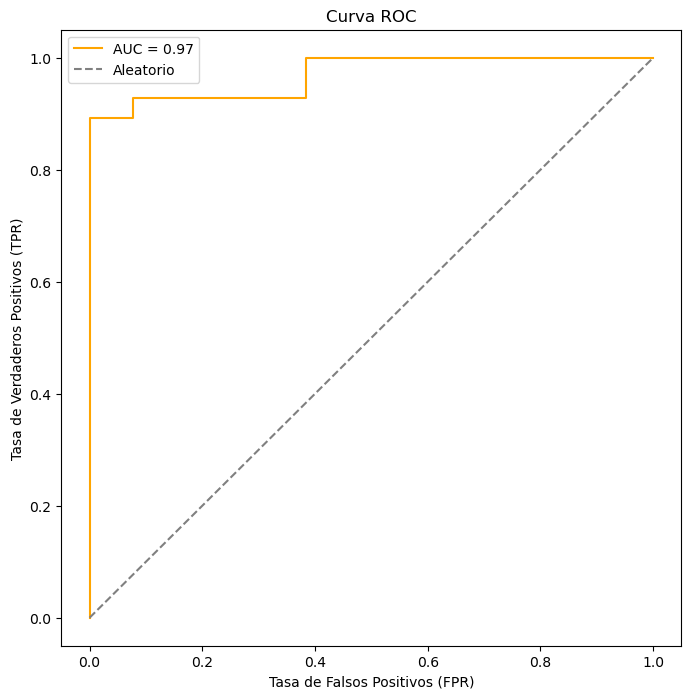

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción para la clase positiva (clase "Caro")
y_prob_clasificacion = modelo_clasificacion.predict_proba(X_test_clasificacion)[:, 1]

# Calcular la Curva ROC
fpr, tpr, umbrales = roc_curve(y_test_clasificacion, y_prob_clasificacion)

# Calcular el AUC-ROC
roc_auc = roc_auc_score(y_test_clasificacion, y_prob_clasificacion)

# Graficar la Curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend()
plt.show()


In [32]:
# Definir la variable objetivo (y) para la regresión
y_regresion = df['price']

# División de datos en conjuntos de entrenamiento y prueba
X_train_regresion, X_test_regresion, y_train_regresion, y_test_regresion = train_test_split(X, y_regresion, test_size=0.2, random_state=100)


In [37]:
type(y_pred)

numpy.ndarray

In [33]:
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo
modelo_regresion.fit(X_train_regresion, y_train_regresion)


LinearRegression()

In [34]:
# Realizar predicciones en el conjunto de prueba
y_pred_regresion = modelo_regresion.predict(X_test_regresion)

# Evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error, r2_score

mse_regresion = mean_squared_error(y_test_regresion, y_pred_regresion)
r2_regresion = r2_score(y_test_regresion, y_pred_regresion)

print(f"Error Cuadrático Medio (MSE) en regresión: {mse_regresion}")
print(f"Coeficiente de Determinación (R cuadrado) en regresión: {r2_regresion}")


Error Cuadrático Medio (MSE) en regresión: 7084888.747225697
Coeficiente de Determinación (R cuadrado) en regresión: 0.9080347746211999


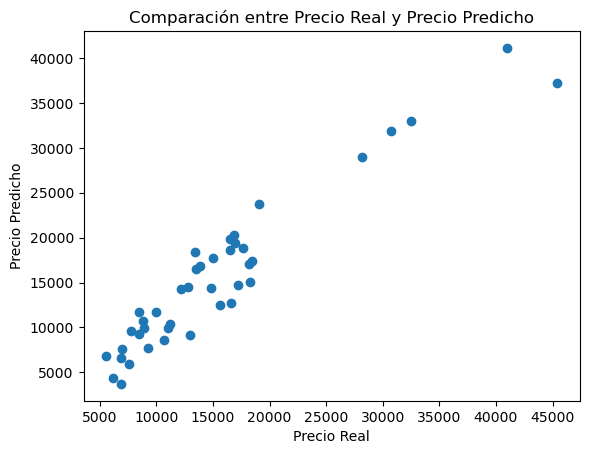

In [35]:
plt.scatter(y_test_regresion, y_pred_regresion)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre Precio Real y Precio Predicho")
plt.show()
